# Discrete Fourier Transform (DFT) — Step by Step

This notebook teaches and computes the **Discrete Fourier Transform** from its mathematical definition,
prioritising transparency and understanding over conciseness.

---

## 1. What is the DFT?

Given a **real-valued discrete-time sequence** $x[m]$ of length $N$, the DFT produces a sequence
$X[k]$ of $N$ complex numbers that describe the frequency content of $x[m]$.

### Definition

$$
X[k] = \sum_{m=0}^{N-1} x[m] \; e^{-j\frac{2\pi}{N}mk}, \qquad k = 0, 1, \dots, N-1
$$

where:

| Symbol | Meaning |
|--------|---------|
| $m$    | **Temporal index** — identifies the position of each sample in the time-domain sequence. $m = 0, 1, \dots, N-1$ |
| $k$    | **Frequency index** — identifies which frequency component we are computing. $k = 0, 1, \dots, N-1$ |
| $N$    | Length of the sequence (total number of samples) |
| $j$    | Imaginary unit ($j^2 = -1$) |

### Euler's formula

Each complex exponential can be decomposed as:

$$
e^{-j\theta} = \cos\theta - j\sin\theta
$$

This is the key identity we will use to break every DFT term into real (cosine) and imaginary (sine) parts.

---

## 2. Setup and Input Sequence

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4, -2, 8, 1])  # sequence
N = len(x)                            

m_indices = np.arange(N)
k_indices = np.arange(N)

print(f"Sequence x[m] = {x}")
print(f"Length N = {N}")
print(f"Temporal indices m = {m_indices}")
print(f"Frequency indices k = {k_indices}")

Sequence x[m] = [ 4 -2  8  1]
Length N = 4
Temporal indices m = [0 1 2 3]
Frequency indices k = [0 1 2 3]


---

## 3. Computing the DFT Term by Term

For **each** frequency index $k$, we will:

1. Compute the angle $\theta_{m,k} = \frac{2\pi}{N} m k$ for every temporal index $m$.
2. Evaluate the complex exponential $e^{-j\theta_{m,k}} = \cos\theta_{m,k} - j\sin\theta_{m,k}$ (Euler).
3. Multiply by the sample value: $x[m] \cdot e^{-j\theta_{m,k}}$.
4. Sum over all $m$ to obtain $X[k]$.

In [3]:
from IPython.display import display, Math, Markdown

X = np.zeros(N, dtype=complex)

for k in k_indices:
    display(Markdown(f"#### Frequency index $k = {k}$"))
    display(Markdown("---"))
    running_sum = 0 + 0j

    for m in m_indices:
        # Compute the angle θ = (2π / N) * m * k
        theta = (2 * np.pi / N) * m * k

        # Euler decomposition  e^{-jθ} = cos(θ) - j·sin(θ)
        cos_part = np.cos(theta)
        sin_part = np.sin(theta)
        exponential = cos_part - 1j * sin_part

        # Multiply by the sample  x[m] · e^{-jθ}
        product = x[m] * exponential

        # LaTeX
        display(Markdown(f"**$m = {m}$**"))

        display(Math(
            rf"\theta = \frac{{2\pi}}{{{N}}} \cdot {m} \cdot {k} "
            rf"= {theta:.2f} \;\text{{rad}} \; ({np.degrees(theta):.2f}^\circ)"
        ))

        display(Math(
            rf"\cos(\theta) = {cos_part:.2f}, \quad \sin(\theta) = {sin_part:.2f}"
        ))

        # Format exponential sign
        if exponential.imag >= 0:
            exp_sign = "+"
        else:
            exp_sign = "-"

        display(Math(
            rf"e^{{-j\theta}} = {cos_part:.2f} - j \cdot {sin_part:.2f} "
            rf"= {exponential.real:.2f} {exp_sign} {abs(exponential.imag):.2f}\,j"
        ))

        # Format product sign
        if product.imag >= 0:
            prod_sign = "+"
        else:
            prod_sign = "-"

        display(Math(
            rf"x[{m}] \cdot e^{{-j\theta}} = {x[m]:.2f} \cdot "
            rf"({exponential.real:.2f} {exp_sign} {abs(exponential.imag):.2f}\,j) "
            rf"= {product.real:.2f} {prod_sign} {abs(product.imag):.2f}\,j"
        ))

        running_sum += product

    X[k] = running_sum

    # Format result sign
    if X[k].imag >= 0:
        res_sign = "+"
    else:
        res_sign = "-"

    display(Markdown("---"))
    display(Math(
        rf"\boxed{{X[{k}] = \sum = {X[k].real:.2f} {res_sign} {abs(X[k].imag):.2f}\,j}}"
    ))
    display(Markdown("<br>"))

#### Frequency index $k = 0$

---

**$m = 0$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 1$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 2$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 3$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

<br>

#### Frequency index $k = 1$

---

**$m = 0$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 1$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 2$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 3$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

<br>

#### Frequency index $k = 2$

---

**$m = 0$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 1$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 2$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 3$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

<br>

#### Frequency index $k = 3$

---

**$m = 0$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 1$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 2$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**$m = 3$**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

<br>

---

## 4. Summary of DFT Results

In [4]:
print("DFT Results")
print("-" * 50)
for k in k_indices:
    print(f"  X[{k}] = {X[k].real: .2f} {X[k].imag:+.2f}j")

DFT Results
--------------------------------------------------
  X[0] =  11.00 +0.00j
  X[1] = -4.00 +3.00j
  X[2] =  13.00 +0.00j
  X[3] = -4.00 -3.00j


---

## 5. Magnitude and Phase — Manual Computation

### Magnitude

For a complex number $X[k] = a + jb$:

$$
|X[k]| = \sqrt{a^2 + b^2}
$$

### Phase (with explicit quadrant logic)

The phase $\angle X[k]$ is the angle of the complex number in the complex plane.
Using $\arctan(b/a)$ alone is **not** sufficient because `arctan` only returns values in
$(-\pi/2, \pi/2)$, which covers only quadrants I and IV.

We must check **which quadrant** the point $(a, b)$ lies in and correct accordingly:

| Case | Condition | Quadrant / Axis | Phase formula |
|------|-----------|----------------|---------------|
| 1 | $a > 0$  | Q-I or Q-IV | $\phi = \arctan(b/a)$ |
| 2 | $a < 0,\; b > 0$ | Q-II | $\phi = \arctan(b/a) + \pi$ |
| 3 | $a < 0,\; b < 0$    | Q-III | $\phi = \arctan(b/a) - \pi$ |
| 4 | $a = 0,\; b > 0$    | Positive imaginary axis | $\phi = +\pi/2$ |
| 4 | $a = 0,\; b < 0$    | Negative imaginary axis | $\phi = -\pi/2$ |
| 5 | $b = 0,\; a > 0$    | Positive real axis | $\phi = 0$ |
| 5 | $b = 0,\; a < 0$    | Negative real axis | $\phi = \pi$ |
| — | $a = 0,\; b = 0$    | Origin | $\phi = 0$ (undefined, but we set 0 by convention) |

In [5]:
def manual_phase(a, b):
    """
    Compute the phase angle of the complex number a + jb
    using explicit quadrant logic (equivalent to atan2(b, a)).

    Returns the angle in radians in the range (-π, π].
    """
    # Tolerance for floating-point comparisons to zero
    tol = 1e-12

    if abs(a) < tol and abs(b) < tol:
        # Both real and imaginary parts are zero.
        # The phase is mathematically undefined; we return 0 by convention.
        return 0.0

    if abs(a) < tol:
        # The number lies on the imaginary axis.
        if b > 0:
            return np.pi / 2      # positive imaginary axis → +π/2
        else:
            return -np.pi / 2     # negative imaginary axis → −π/2

    if abs(b) < tol:
        # The number lies on the real axis.
        if a > 0:
            return 0.0            # positive real axis → 0
        else:
            return np.pi          # negative real axis → π

    # a ≠ 0 and b ≠ 0, so arctan(b/a) is well-defined
    base_angle = np.arctan(b / a)

    if a > 0:
        # Quadrant I (b > 0) or Quadrant IV (b < 0)
        # arctan already gives the correct angle in (-π/2, π/2)
        return base_angle
    else:
        # a < 0
        if b > 0:
            # Quadrant II: add π to rotate from Q-IV to Q-II
            return base_angle + np.pi
        else:
            # Quadrant III: subtract π to rotate from Q-I to Q-III
            return base_angle - np.pi

In [6]:
from IPython.display import display, Math, Latex, Markdown

magnitudes = np.zeros(N)
phases_uncorrected = np.zeros(N)
phases_corrected = np.zeros(N)

display(Markdown("### Magnitude and Phase of each $X[k]$"))
display(Markdown("---"))

for k in k_indices:
    a = X[k].real
    b = X[k].imag

    # Magnitude
    mag = np.sqrt(a**2 + b**2)
    magnitudes[k] = mag

    # Uncorrected phase
    tol = 1e-12
    if abs(a) < tol and abs(b) < tol:
        raw_arctan = 0.0
    elif abs(a) < tol:
        if b > 0:
            raw_arctan = np.pi / 2
        else:
            raw_arctan = -np.pi / 2
    elif abs(b) < tol:
        if a > 0:
            raw_arctan = 0.0
        else:
            raw_arctan = np.pi
    else:
        raw_arctan = np.arctan(b / a)
    phases_uncorrected[k] = raw_arctan

    # Corrected phase
    phi = manual_phase(a, b)
    phases_corrected[k] = phi

    # Determine case
    if abs(a) < tol and abs(b) < tol:
        case_latex = r"\text{Origin — phase set to } 0 \text{ by convention}"
    elif abs(a) < tol:
        if b > 0:
            case_latex = r"\text{Case 4: positive imaginary axis } (\theta = +\pi/2)"
        else:
            case_latex = r"\text{Case 4: negative imaginary axis } (\theta = -\pi/2)"
    elif abs(b) < tol:
        if a > 0:
            case_latex = r"\text{Case 5: positive real axis } (\theta = 0)"
        else:
            case_latex = r"\text{Case 5: negative real axis } (\theta = \pi)"
    elif a > 0:
        case_latex = r"\text{Case 1: Q-I / Q-IV — } \arctan \text{ is sufficient, no correction needed}"
    elif b > 0:
        case_latex = r"\text{Case 2: Q-II — } \arctan(b/a) + \pi \text{ correction}"
    else:
        case_latex = r"\text{Case 3: Q-III — } \arctan(b/a) - \pi \text{ correction}"

    # --- Format sign for imaginary part ---
    if b >= 0:
        imag_sign = "+"
    else:
        imag_sign = "-"

    # LaTeX
    display(Markdown(f"#### Frequency index $k = {k}$"))

    display(Math(
        rf"X[{k}] = {a:.6f} {imag_sign} {abs(b):.6f}\,j"
    ))

    display(Math(
        rf"a = {a:.6f}, \quad b = {b:.6f}"
    ))

    display(Math(
        rf"|X[{k}]| = \sqrt{{{a:.6f}^2 + {b:.6f}^2}} "
        rf"= \sqrt{{{a**2 + b**2:.6f}}} = {mag:.6f}"
    ))

    display(Math(case_latex))

    display(Math(
        rf"\arctan(b/a) = {raw_arctan:.6f} \;\text{{rad}} \;"
        rf"({np.degrees(raw_arctan):.2f}^\circ) "
        rf"\quad \leftarrow \text{{NOT corrected}}"
    ))

    display(Math(
        rf"\angle X[{k}] = {phi:.6f} \;\text{{rad}} \;"
        rf"({np.degrees(phi):.2f}^\circ) "
        rf"\quad \leftarrow \text{{CORRECTED}}"
    ))

    if not np.isclose(raw_arctan, phi):
        display(Markdown(
            rf"> **Warning:** The raw $\arctan$ gives the **wrong** angle "
            rf"because $(a, b)$ is not in Q-I / Q-IV."
        ))

    display(Markdown("---"))

display(Markdown(
    "**Key takeaway:** $\\arctan(b/a)$ alone only works when $a > 0$ (Quadrants I and IV). "
    "For Quadrants II, III, and the axes, you **must** apply corrections. "
    "This is exactly what $\\text{atan2}(b, a)$ does internally."
))

### Magnitude and Phase of each $X[k]$

---

#### Frequency index $k = 0$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

#### Frequency index $k = 1$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

> **Warning:** The raw $\arctan$ gives the **wrong** angle because $(a, b)$ is not in Q-I / Q-IV.

---

#### Frequency index $k = 2$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

#### Frequency index $k = 3$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

> **Warning:** The raw $\arctan$ gives the **wrong** angle because $(a, b)$ is not in Q-I / Q-IV.

---

**Key takeaway:** $\arctan(b/a)$ alone only works when $a > 0$ (Quadrants I and IV). For Quadrants II, III, and the axes, you **must** apply corrections. This is exactly what $\text{atan2}(b, a)$ does internally.

---

## 7. Magnitude and Phase Spectra Plots

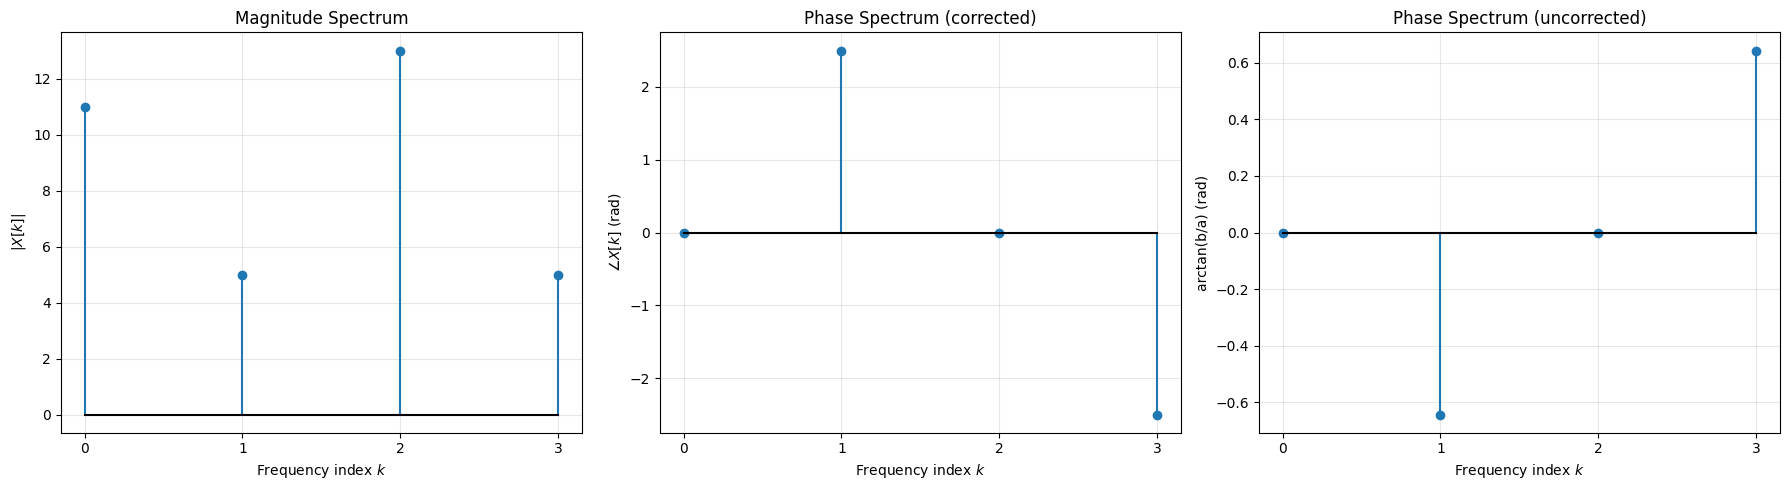

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ---- Magnitude Spectrum ----
axes[0].stem(k_indices, magnitudes, basefmt='k-')
axes[0].set_xlabel('Frequency index $k$')
axes[0].set_ylabel('$|X[k]|$')
axes[0].set_title('Magnitude Spectrum')
axes[0].set_xticks(k_indices)
axes[0].grid(True, alpha=0.3)

# ---- Phase Spectrum (corrected) ----
axes[1].stem(k_indices, phases_corrected, basefmt='k-')
axes[1].set_xlabel('Frequency index $k$')
axes[1].set_ylabel('$\\angle X[k]$ (rad)')
axes[1].set_title('Phase Spectrum (corrected)')
axes[1].set_xticks(k_indices)
axes[1].grid(True, alpha=0.3)

# ---- Phase Spectrum (uncorrected arctan) ----
# Shows the raw arctan(b/a) values in degrees on a standard X-Y plot.
# NaN entries (where a ≈ 0) will simply not appear as points.
axes[2].stem(k_indices, phases_uncorrected, basefmt='k-')
axes[2].set_xlabel('Frequency index $k$')
axes[2].set_ylabel('arctan(b/a) (rad)')
axes[2].set_title('Phase Spectrum (uncorrected)')
axes[2].set_xticks(k_indices)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 8. Verification Against `np.fft.fft`

We now compute the DFT using NumPy's optimised FFT and compare it to our manual computation.
Any differences should be on the order of **machine epsilon** ($\approx 10^{-15}$ for 64-bit floats)
and arise because:

- Floating-point arithmetic is **not associative**: the order in which additions and multiplications
  are performed affects rounding.
- The FFT uses a different algorithm (Cooley–Tukey) that restructures the computation into
  butterfly operations, so the sequence of operations differs from our direct summation.

In [8]:
X_numpy = np.fft.fft(x)

print("Comparison: Manual DFT vs np.fft.fft")
print("=" * 72)
print(f"{'k':<4} {'Manual X[k]':<30} {'NumPy X[k]':<30} {'|Difference|':<15}")
print("-" * 72)

for k in k_indices:
    diff = abs(X[k] - X_numpy[k])
    print(f"{k:<4} {X[k].real: .10f}{X[k].imag:+.10f}j   "
          f"{X_numpy[k].real: .10f}{X_numpy[k].imag:+.10f}j   "
          f"{diff:.2e}")

# Overall check
max_diff = np.max(np.abs(X - X_numpy))
print(f"\nMaximum absolute difference: {max_diff:.2e}")
print(f"Machine epsilon (float64):   {np.finfo(float).eps:.2e}")

if max_diff < 1e-10:
    print("\nConclusion: Manual DFT and NumPy FFT agree to high precision.")
    print("The tiny differences (if any) are due to different ordering of")
    print("floating-point operations, not a mathematical error.")
else:
    print("\nWARNING: Significant difference detected — check the implementation.")

Comparison: Manual DFT vs np.fft.fft
k    Manual X[k]                    NumPy X[k]                     |Difference|   
------------------------------------------------------------------------
0     11.0000000000+0.0000000000j    11.0000000000+0.0000000000j   0.00e+00
1    -4.0000000000+3.0000000000j   -4.0000000000+3.0000000000j   8.88e-16
2     13.0000000000+0.0000000000j    13.0000000000+0.0000000000j   1.84e-15
3    -4.0000000000-3.0000000000j   -4.0000000000-3.0000000000j   3.14e-15

Maximum absolute difference: 3.14e-15
Machine epsilon (float64):   2.22e-16

Conclusion: Manual DFT and NumPy FFT agree to high precision.
The tiny differences (if any) are due to different ordering of
floating-point operations, not a mathematical error.


---

## 9. Summary

| Step | What we did |
|------|-------------|
| **Definition** | Stated the DFT formula and defined indices $m$ (time) and $k$ (frequency) |
| **Term-by-term computation** | For each $k$, expanded every exponential via Euler, multiplied by $x[m]$, and summed |
| **Magnitude** | Computed $|X[k]| = \sqrt{a^2 + b^2}$ |
| **Phase** | Computed $\angle X[k]$ with explicit quadrant handling (not `np.angle`) |
| **Conjugate symmetry** | Verified $X[k] = X^*[N-k]$ for our real signal and explained why it holds |
| **Plots** | Magnitude and phase spectra indexed by $k$ |
| **Verification** | Confirmed agreement with `np.fft.fft` and explained floating-point differences |